In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt



Importiong the ShapeFiles and Plotting them

<Axes: >

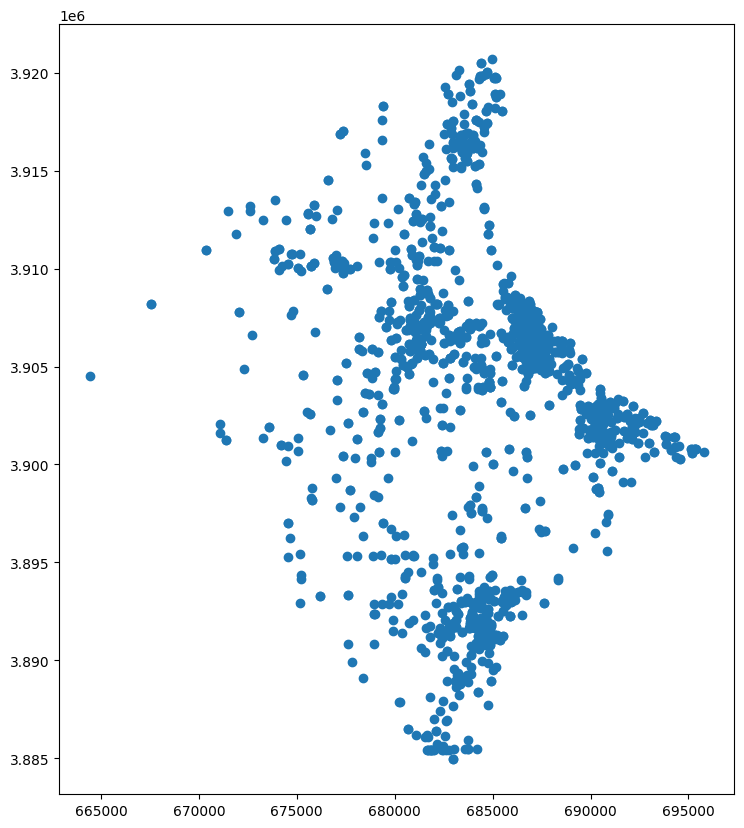

In [3]:
puit=gpd.read_file("puits chebba.shp")
puit.plot(figsize=(10,10))

In [4]:
puit.sample(10)

,N,N_ORDRE,ANN,NON_PUI,RS_GL,POINT_X,POINT_Y,geometry
1686,1614,746,0,CHDLI SALHI,5,681513.459987,3.914816e+06,POINT (681513.460 3914816.220)
203,2950,317,1985,MED HAMDI,4,682591.809987,3.892079e+06,POINT (682591.810 3892079.080)
1539,1036,261,1985,BIR AMOR,6,681458.759987,3.909422e+06,POINT (681458.760 3909422.150)
813,2759,48,0,MED EL FALAH,3,687904.869987,3.904772e+06,POINT (687904.870 3904771.730)
1420,2710,559,1988,MEFTAH ALOUANE SALAH AYAT,3,686974.519987,3.907937e+06,POINT (686974.520 3907937.180)
623,3310,723,0,TOUATI B MED FARHAT,5,689468.619987,3.902252e+06,POINT (689468.620 3902252.170)
658,3210,46,0,SALAH MKACHER,3,690445.059987,3.902572e+06,POINT (690445.060 3902572.370)
635,3336,616,1990,PUBLIC DE OULED,0,679271.169987,3.902343e+06,POINT (679271.170 3902343.200)
35,4013,157,1994,ALI BEN OTHMAN,6,682311.909987,3.887424e+06,POINT (682311.910 3887424.100)
885,3058,553,0,BRAHIM ATIA,2,689576.149987,3.905362e+06,POINT (689576.150 3905361.610)


<Axes: >

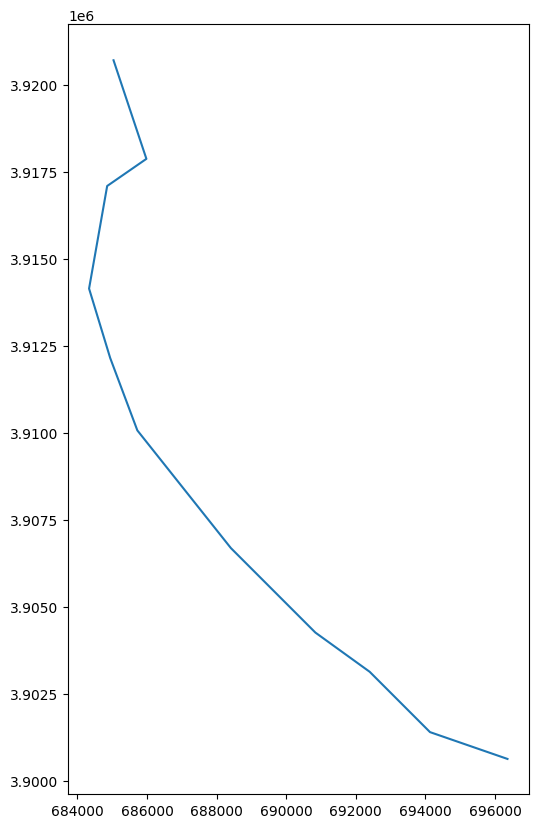

In [5]:
cote=gpd.read_file('Cote.shp')
cote.plot(figsize=(10,10))

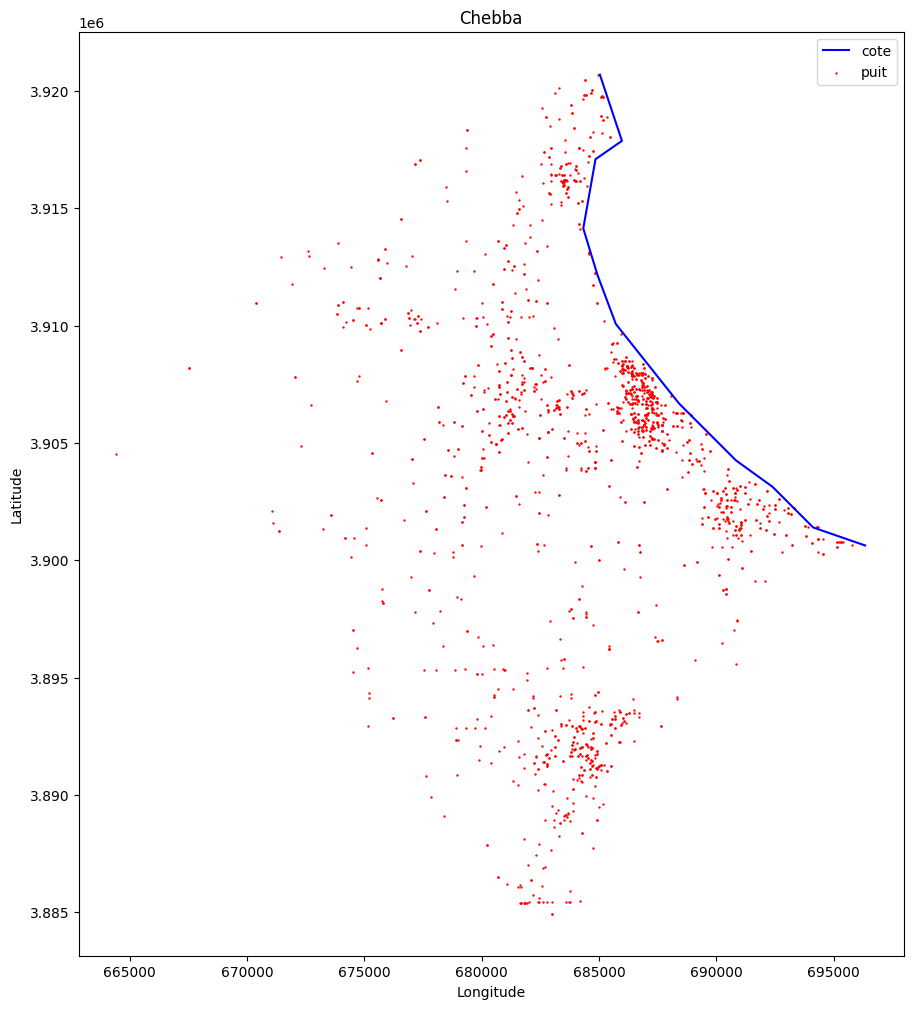

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
cote.plot(ax=ax, color='blue', label='cote')
puit.plot(ax=ax, color='red',markersize=0.5, label='puit')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Chebba')
ax.legend()
plt.show()


Matching the CRS of the coast line and the 'Puit'

In [7]:
puit.crs = 'EPSG:32632'
cote = cote.to_crs(puit.crs)


Creating a Buffer zone and a new Geodataframe of the Puit in the 5km zone within the coast 

In [8]:
buffer_distance = 5*1000
coast_buffer = cote.geometry.buffer(buffer_distance)
coast_buffer_gdf = gpd.GeoDataFrame(geometry=coast_buffer, crs=cote.crs)


Using the unary_union method to combine geometry

In [9]:
puit_within_coast = puit[puit.geometry.within(coast_buffer_gdf.unary_union)]


In [10]:
puit_within_coast

,N,N_ORDRE,ANN,NON_PUI,RS_GL,POINT_X,POINT_Y,geometry
420,588,613,1989,ALI BEN MED BEN SALAH HALOU,8,690411.049987,3.898577e+06,POINT (690411.050 3898576.700)
421,3218,613,0,ALI HALOUAS,8,690411.049987,3.898577e+06,POINT (690411.050 3898576.700)
424,2525,847,1998,MED BEN HEDI MERAOUI,13,690280.329987,3.898729e+06,POINT (690280.330 3898729.300)
425,4666,847,1997,MOHAMED B.HEDI EL MERAOUI,1,690280.329987,3.898729e+06,POINT (690280.330 3898729.300)
426,1610,872,1999,HASSEN BEN ALI JRIBI,10,690406.839987,3.898776e+06,POINT (690406.840 3898776.360)
...,...,...,...,...,...,...,...,...
1836,3572,478,0,EZEDDINE MSAAD,6,684724.059987,3.920031e+06,POINT (684724.060 3920030.700)
1837,1462,1499,200,HABIB BEN MOHAMED BEN HABIB BEN ALYA,7,683286.239987,3.920145e+06,POINT (683286.240 3920145.440)
1838,2231,151,1981,MAHMOUD BEN ALI SGANNI,3,684387.759987,3.920479e+06,POINT (684387.760 3920478.750)
1839,1065,151,1981,MOHAMED ZGARNI,3,684387.759987,3.920479e+06,POINT (684387.760 3920478.750)


C:\Users\sayeh omar\AppData\Local\Temp\ipykernel_17220\1243563551.py:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


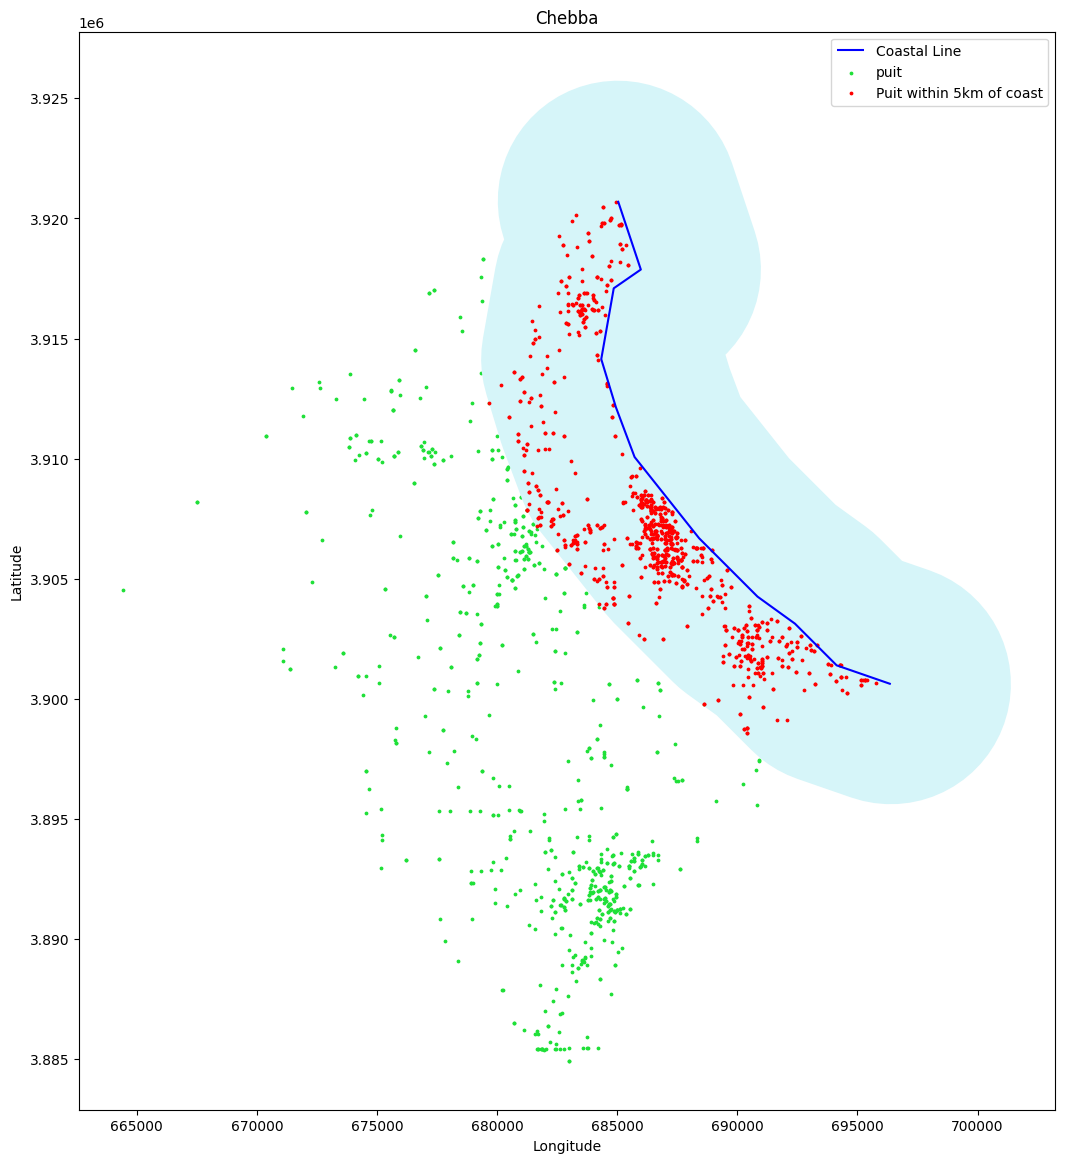

In [11]:

fig, ax = plt.subplots(figsize=(18, 14))


cote.plot(ax=ax, color='blue', label='Coastal Line')
puit.plot(ax=ax, color='#1fe038',markersize=3, label='puit')
 
coast_buffer_gdf.plot(ax=ax, color='#d6f5f9', label='Coastal Buffer zone')

puit_within_coast.plot(ax=ax, marker='o', color='red', markersize=3, label='Puit within 5km of coast')




ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Chebba')


plt.legend()


plt.show()


C:\Users\sayeh omar\AppData\Local\Temp\ipykernel_17220\2397399705.py:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


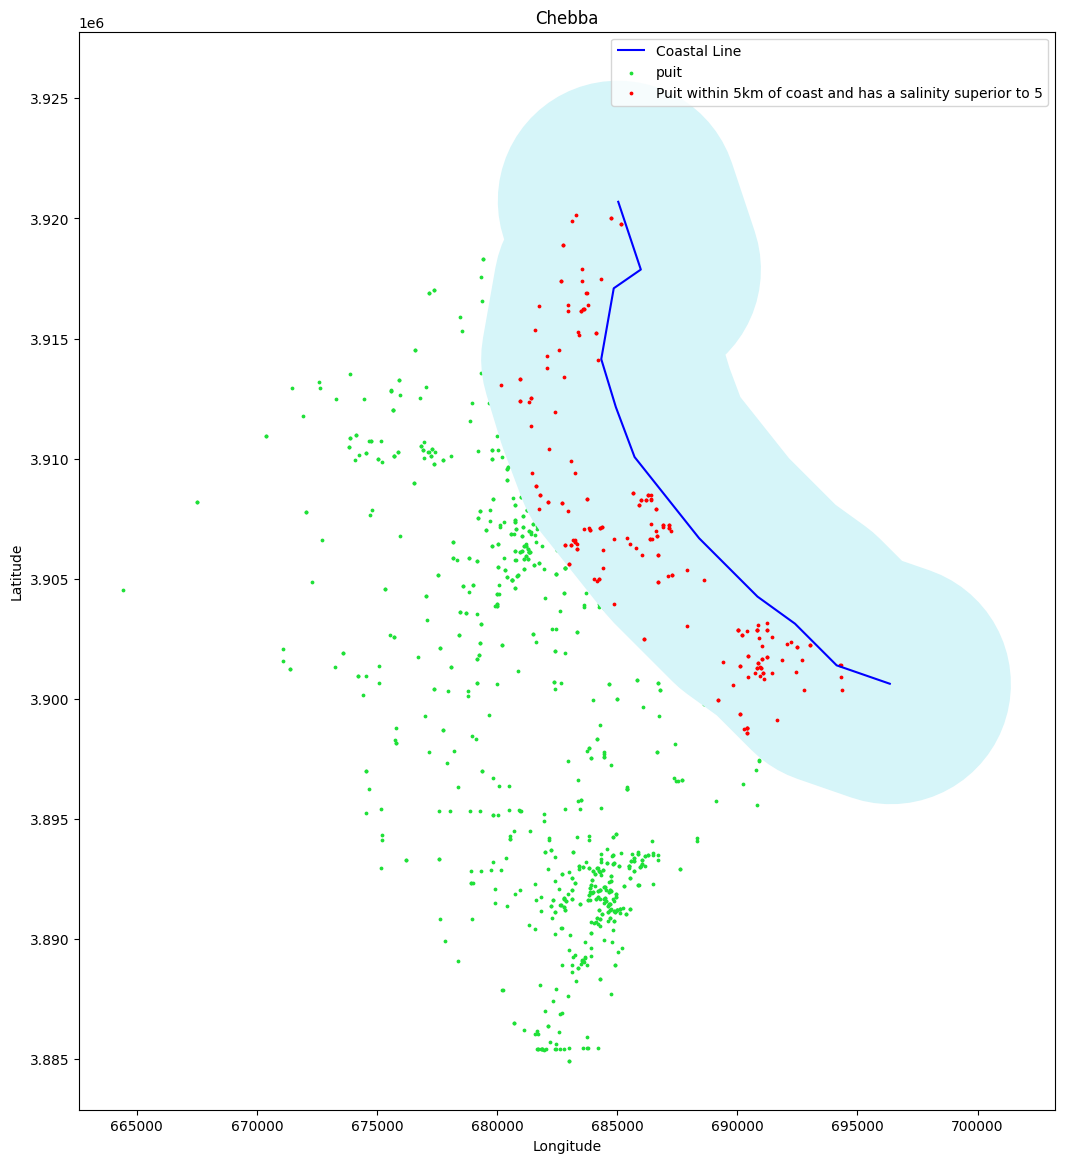

In [14]:

fig, ax = plt.subplots(figsize=(18, 14))


cote.plot(ax=ax, color='blue', label='Coastal Line')
puit.plot(ax=ax, color='#1fe038',markersize=3, label='puit')
 
coast_buffer_gdf.plot(ax=ax, color='#d6f5f9', label='Coastal Buffer zone')

(puit_within_coast[puit_within_coast['RS_GL'] > 5]).plot(ax=ax, marker='o', color='red', markersize=3, label='Puit within 5km of coast and has a salinity superior to 5')




ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Chebba')


plt.legend()


plt.show()